In [ ]:
#Resume Analyser Project - Interview Preparation [Prajval Yelpale]

In [ ]:
#Installing required packages:

!pip install resume-parser
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz
!pip install importlib-metadata==3.2.0

In [ ]:
import nltk
import spacy

!python -m spacy download en_core_web_sm
!python -m nltk.downloader stopwords
!python -m nltk.downloader averaged_perceptron_tagger
!python -m nltk.downloader punkt
!python -m nltk.downloader universal_tagset
!python -m nltk.downloader wordnet
!python -m nltk.downloader brown
!python -m nltk.downloader maxent_ne_chunker

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
##### Data preprocessing: Dataset cleaning

import pandas as pd

resumeDataSet = pd.read_csv(r'/content/ResumeDataset.csv',encoding='utf-8')

import re

def clean_skills(skill_str):
    # Adjust regular expression to match multi-word phrases within double quotes
    cleaned_skills = re.findall(r'"([\w\s.-]+)"|[\w-]+', skill_str)
    cleaned_skills = ["'" + skill.strip('\"') + "'" if '"' in skill else skill.strip() for skill in cleaned_skills]
    # Join the cleaned skills into a single string and remove empty values
    cleaned_str = ', '.join(skill for skill in cleaned_skills if skill)
    skills_str = resumeDataSet['Skills_Or_Keywords'][0]

    # Split the skills into a list based on commas
    skills_list = cleaned_str.split(", ")

    return skills_list


resumeDataSet['Skills_Or_Keywords'] = resumeDataSet.Skills_Or_Keywords.apply(lambda x: clean_skills(x))


resumeDataSet.head()


,Category,Skills_Or_Keywords
0,Web Development,"[HTML, CSS, JavaScript, React.js, Angular, Vue..."
1,Mobile App Development,"[iOS Development, Android Development, Swift, ..."
2,Data Science,"[Python, Machine Learning, Data Analysis, Stat..."
3,Machine Learning,"[Python, Machine Learning, Data Science, Deep ..."
4,Artificial Intelligence,"[Machine Learning, Deep Learning, Computer Vis..."


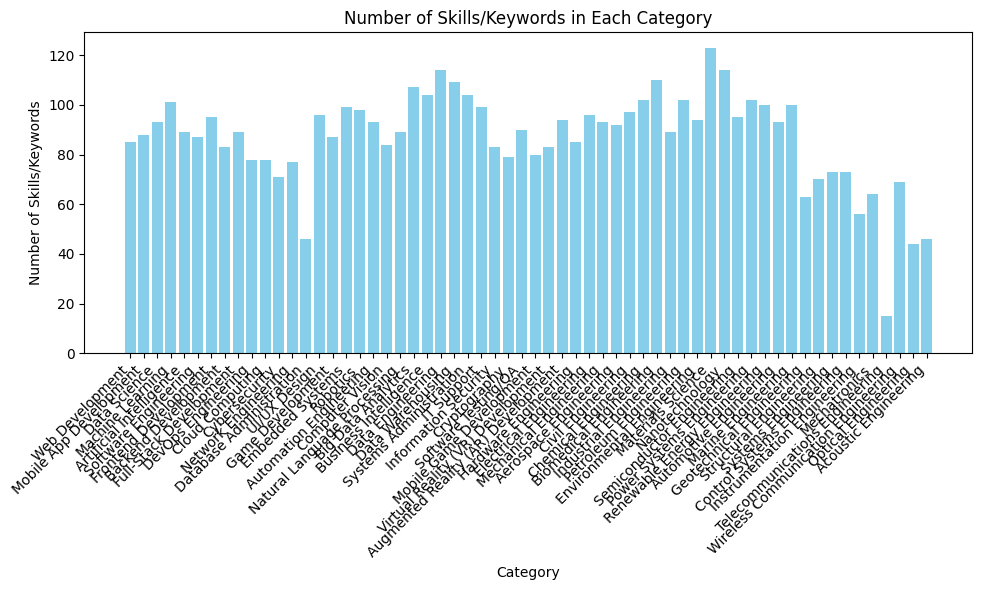

In [ ]:
##### Data Visualization #####

df=resumeDataSet

# Calculate the number of skills in each category
df['Num_Skills'] = df['Skills_Or_Keywords'].apply(len)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Num_Skills'], color='skyblue')
plt.title('Number of Skills/Keywords in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Skills/Keywords')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# This is Resume parsing model (Internal traning included) (Read Documentation)

from resume_parser import resumeparse

In [ ]:
##### Parsing Users Resume Data #####

import pprint
data = resumeparse.read_file(r'/content/Data_science1.pdf')
pprint.pprint(data)

{'Companies worked at': ['Github Tech',
                         'Apps forMahindra &Mahindra',
                         'hackerrank HOBBIES'],
 'degree': [],
 'designition': ['software development intern',
                 'development intern',
                 'software developer',
                 'founder',
                 'chairman'],
 'email': 'dhondpratyay@gmail.com',
 'name': 'GitHub |',
 'phone': '+91 9022137587',
 'skills': ['used :',
            '•HTML •CSS •JS •BootStrap',
            '•BootStrap Studio •MapBox API',
            'PROGRAMMING',
            'Proficient :',
            '•React.js •Vue.js •Java •NoSQL',
            '•SQL •MySQl •C •C++ •Flutter •Dart',
            'Good knowledge :',
            '•HTML •CSS •JS •BootStrap •OOP',
            'Familiar :',
            '•tailwind CSS •PHP',
            'TECHNOLOGIES',
            '•Git •Github •Cloud',
            '•Firebase Firestore & Authentication',
            '•API •Bootstrap Studio •Linux (Ubuntu)',
       

In [ ]:
##### This is function to get the users resume category and predict the actual category and finding the index of that perticular category #####

#!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def find_similar_category(input_category, categories):
    similarities = [(category, fuzz.ratio(input_category, category)) for category in categories]
    most_similar = max(similarities, key=lambda x: x[1])

    most_similar_category = most_similar[0]
    similarity_score = most_similar[1]

    # Find the index of the most similar category
    index_of_most_similar = categories.tolist().index(most_similar_category)

    return most_similar_category, similarity_score, index_of_most_similar

# Example usage
input_category = 'software enginner'  # Replace with your desired category
categories = resumeDataSet['Category'].unique()

most_similar_category, similarity_score, index_of_most_similar = find_similar_category(input_category, categories)

print(f"Most similar category: {most_similar_category}, Similarity score: {similarity_score}")
print(f"Index of the most similar category: {index_of_most_similar}")
print(resumeDataSet['Skills_Or_Keywords'][index_of_most_similar])
print(resumeDataSet.iloc[index_of_most_similar][0])

Most similar category: Software Engineering, Similarity score: 76
Index of the most similar category: 5
['Python', 'Java', 'JavaScript', 'HTML', 'CSS', 'SQL', 'Git', 'Linux', 'Agile Methodologies', 'RESTful API', 'Django', 'React', 'Node.js', 'Angular', 'Spring Framework', 'MVC Architecture', 'Microservices', 'RESTful Web Services', 'Web Development', 'Database Design', 'Data Structures', 'Algorithms', 'Version Control', 'Problem-Solving', 'Debugging', 'Agile Software Development', 'Scrum', 'Kanban', 'Unit Testing', 'Integration Testing', 'System Testing', 'Code Review', 'Documentation', 'Team Collaboration', 'Technical Writing', 'Responsive Design', 'Frontend Development', 'Backend Development', 'Serverless Architecture', 'AWS', 'Azure', 'REST API', 'GraphQL', 'MongoDB', 'MySQL', 'PostgreSQL', 'NoSQL', 'Apache Kafka', 'RabbitMQ', 'Redis', 'Elasticsearch', 'GraphQL', 'Jenkins', 'Travis CI', 'CircleCI', 'GitHub Actions', 'Kubernetes', 'Terraform', 'Ansible', 'Software Architecture', 'De

In [ ]:
##### This is function to clean and normalize the skills parsed from users resume #####

def normalize_keyword(keyword):
    # Convert to lowercase
    keyword = keyword.lower()
    # Replace non-alphanumeric characters (except spaces and hyphens) with spaces
    keyword = re.sub(r'[^a-z0-9 -]', ' ', keyword)
    # Remove extra spaces
    keyword = re.sub(r'\s+', ' ', keyword).strip()
    return keyword


def extract_keywords(skill_text):
    # Normalize and split into individual keywords
    normalized_text = normalize_keyword(skill_text)
    return normalized_text.split()  # Split into individual skills

user_skills = []
for skill_text in data['skills']:
    extracted_skills = extract_keywords(skill_text)  # Extract normalized skills
    user_skills.extend(extracted_skills)  # Add to the list of all skills

print(user_skills)

['used', 'html', 'css', 'js', 'bootstrap', 'bootstrap', 'studio', 'mapbox', 'api', 'programming', 'proficient', 'react', 'js', 'vue', 'js', 'java', 'nosql', 'sql', 'mysql', 'c', 'c', 'flutter', 'dart', 'good', 'knowledge', 'html', 'css', 'js', 'bootstrap', 'oop', 'familiar', 'tailwind', 'css', 'php', 'technologies', 'git', 'github', 'cloud', 'firebase', 'firestore', 'authentication', 'api', 'bootstrap', 'studio', 'linux', 'ubuntu', 'figma']


In [ ]:
#### TF - IDF Model for Skills/Keywords Recommendation #####

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process  # Fuzzy matching library

# Convert dataset skills to a string for vectorization
dataset_skills = ', '.join(resumeDataSet['Skills_Or_Keywords'][index_of_most_similar])

# TF-IDF vectorization for the dataset skills
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([dataset_skills])

# Convert the user's skills to a string
user_skills_str = ', '.join(user_skills)

# Calculate cosine similarity between the user's skills and the dataset skills
user_tfidf = vectorizer.transform([user_skills_str])
similarity_scores = cosine_similarity(user_tfidf, tfidf_matrix)

# Get all dataset skills as a list
dataset_skills_list = dataset_skills.split(', ')

# Identify unique skills that are not similar to any user skill
threshold = 90  # Similarity threshold (0-100)
missing_keywords = []

# Check each dataset skill against user skills using fuzzy matching
for skill in dataset_skills_list:
    # Find the best match among user skills and get the similarity score
    best_match, score = process.extractOne(skill.lower(), [s.lower() for s in user_skills])
    if score < threshold:
        missing_keywords.append(skill)

# Recommend the top 10 missing keywords
recommended_keywords = missing_keywords[:10]  # Get the first 10 unique missing keywords

# Output the recommended skills/keywords
print("User Skills:", user_skills)
print("Dataset Skills:", dataset_skills)
print("Recommended Skills/Keywords:", recommended_keywords)


User Skills: ['used', 'html', 'css', 'js', 'bootstrap', 'bootstrap', 'studio', 'mapbox', 'api', 'programming', 'proficient', 'react', 'js', 'vue', 'js', 'java', 'nosql', 'sql', 'mysql', 'c', 'c', 'flutter', 'dart', 'good', 'knowledge', 'html', 'css', 'js', 'bootstrap', 'oop', 'familiar', 'tailwind', 'css', 'php', 'technologies', 'git', 'github', 'cloud', 'firebase', 'firestore', 'authentication', 'api', 'bootstrap', 'studio', 'linux', 'ubuntu', 'figma']
Dataset Skills: Python, Java, JavaScript, HTML, CSS, SQL, Git, Linux, Agile Methodologies, RESTful API, Django, React, Node.js, Angular, Spring Framework, MVC Architecture, Microservices, RESTful Web Services, Web Development, Database Design, Data Structures, Algorithms, Version Control, Problem-Solving, Debugging, Agile Software Development, Scrum, Kanban, Unit Testing, Integration Testing, System Testing, Code Review, Documentation, Team Collaboration, Technical Writing, Responsive Design, Frontend Development, Backend Development, S

In [ ]:
##### This is algorithm to calculate the resume score #####
import re

def normalize(text):
    # Normalize by converting to lowercase and removing extra spaces
    return re.sub(r'\s+', ' ', text.strip().lower())

def calculate_resume_score(resume_data, dataset_skills, weight_factors):
    # Normalize skills from the resume
    resume_skills = {normalize(skill) for skill in resume_data.get("Skills", []) if skill.strip()}

    # Normalize dataset skills and create a dictionary with indices as weights
    normalized_dataset_skills = {
        normalize(skill): index
        for index, skill in enumerate(dataset_skills)
    }

    # Calculate skill relevance score based on matching skills
    matching_skills = [
        normalized_dataset_skills[skill]
        for skill in resume_skills
        if skill in normalized_dataset_skills
    ]
    skill_count = len(matching_skills)

    # If the dataset has fewer skills, avoid division by zero
    if skill_count == 0:
        skill_relevance_score = 0
    else:
        # Consider the normalized position of the matched skills
        weighted_total = sum(
            (len(dataset_skills) - pos) for pos in matching_skills
        )
        max_weighted_total = sum(range(len(dataset_skills), 0, -1))
        skill_relevance_score = (weighted_total / max_weighted_total) * 100 * weight_factors["skills"]

    # Calculate experience score based on total experience
    total_experience = resume_data.get("total_exp", 0)
    max_experience = 20  # Assume a maximum of 20 years for full score
    experience_score = min(total_experience / max_experience, 1) * 100 * weight_factors["experience"]

    # Calculate education score based on degrees with base scores for missing degrees
    degrees = [normalize(degree) for degree in resume_data.get("degree", []) if degree.strip()]
    degree_score = 20  # Base score for any education

    # Fuzzy matching for degree types
    for degree in degrees:
        # Using fuzz.token_sort_ratio for better matching
        if fuzz.token_sort_ratio(degree, "phd") > 60:
            degree_score = 100
            break
        elif fuzz.token_sort_ratio(degree, "masters") > 60 or fuzz.token_sort_ratio(degree, "msc") > 60:
            degree_score = 70
            break
        elif fuzz.token_sort_ratio(degree, "bachelors") > 60 or fuzz.token_sort_ratio(degree, "bsc") > 60:
            degree_score = 50
            break

    degree_score *= weight_factors["education"]

    # Calculate company score based on companies worked at
    known_companies = [normalize(company) for company in resume_data.get("Companies worked at", []) if company.strip()]
    company_score = max((len(known_companies) / 5) * 100, 20) * weight_factors["companies"]

    # Total score (out of 100)
    total_score = skill_relevance_score + experience_score + degree_score + company_score
    total_score = min(total_score, 100)  # Cap at 100

    return round(total_score, 2)


# Adjusted weight factors
weight_factors = {
    "skills": 0.4,  # Skills have a higher weight
    "experience": 0.3,
    "education": 0.2,
    "companies": 0.1,
}

# Sample data for testing
resume_data = {
    "Skills": user_skills,
    "total_exp": data['total_exp'],
    "degree": data['degree'],
    "Companies worked at": data['Companies worked at'],
}

# Calculate the resume score
resume_score = calculate_resume_score(resume_data, resumeDataSet['Skills_Or_Keywords'][index_of_most_similar], weight_factors)

print("Resume Score:", resume_score)


Resume Score: 17.02
